### OLS 회귀분석 (statsmodels)  
-  전처리한 자료에 회귀분석을 적용해 변수별 회귀계수를 구할 수 있다. 
-  python에서 다양한 통계 분석을 할 수 있도록 기능을 제공

- 다중회귀 공식
$$
y_{i} = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} \cdots \beta_{n} x_{n} + \epsilon_{i}
$$

### 단순회귀
- 연속형 종속변수와 독립변수 간 선형관게 및 설명을 확인하는 기법
- 종속변수와 독립변수가 각각 하나인 경우 단순 선형 회귀 모형
- 오차 평가 지표 모델의 성능을 평가
- statsmodels - ols(formula, data, subset=None, drop_cols=None, *args, **kwargs)
    - 종속변수, 독립변수, fit()모델실행, predict()예측, 변수면에 오점 또는 특수문자 오류발생
- sklearn - LinearRegression()
    - fit_intercept로 절편의 적합 유무를 설정 
    - 모델의 객체로 coef_, intercept_ 속성으로 계수 절편 확인
    - fit() 모델실행, predict()예측
    - MAE  : mean_absolute_error()
    - MSE  : mean_sqared_error()
    - RMSE : 

### 다중 회귀 
- 연속형 종속변수와 두 개 이상의 독립변수 간 선형관계 및 설명을 확인하는 기법
- 필요 시 모델  성능향상을 위해서 파생변수 생성 및 성능 비교
- 명목형 변수가 독립변수인 경우는 가변수 변환 후 모델 구현
- 다중 동선성 문제
    - 독립변수간에 강한 상관관계가 발생되는 문제
    - 상관계수 확인해서 그 중 값이 높은 것을 사전에 제거
    - 회귀모델 생성하게 되면 분산에 대한 팽창계수("VIF") 확인 (10 이상) 관련된 변수 처리
    - from patsy import dmatrices : 수식 기반 데이터 행렬을 생성 분산 팽창 계수를 확인하기 위한 전처리
    - variance_inflation_factor   : VIF 연산을 쉽게 하기 위한 함수, list를 사용해서 값을 추출

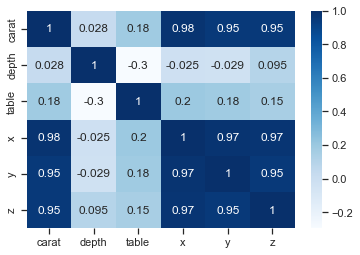

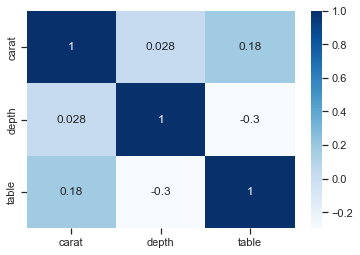

In [99]:
# ex) diamonds.cvs price를 종속 변수로 하고 나머지 수치형 변수를 독립변수로 두기
# 다중 공선성 문제를 확인해보기 문제가 되는 변수는 몇개인가
from patsy import dmatrices
df = pd.read_csv("../../ML_DATA/diamonds.csv")
df01=df.drop("price", axis ='columns')
df01.corr()
sns.heatmap(df01.corr(), cmap='Blues', annot=True,)
plt.show()
# x,y,z가 문제되는것처럼 보인다
# 제외하고 다시
sns.heatmap(df01[['carat','depth','table']].corr(), cmap='Blues', annot=True,)
plt.show()

# df_sub=df01[['carat','depth','table']].corr()


In [100]:
df_sub = df.iloc[:, [6, 0, 4, 5, 7, 8, 9]]

df_sub.corr()
df_sub

,price,carat,depth,table,x,y,z
0,326,0.23,61.5,55.0,3.95,3.98,2.43
1,326,0.21,59.8,61.0,3.89,3.84,2.31
2,327,0.23,56.9,65.0,4.05,4.07,2.31
3,334,0.29,62.4,58.0,4.20,4.23,2.63
4,335,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,2757,0.72,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,61.0,58.0,6.15,6.12,3.74


In [101]:
y, X = dmatrices("price ~" + "+".join(df_sub.columns[1:]), data = df_sub, return_type = "dataframe")
y

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
df_vif = pd.DataFrame()
df_vif["vars"] = X.columns
df_vif["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]
df_vif #csv로 저장

,vars,VIF
0,Intercept,4821.696350
1,carat,21.602712
2,depth,1.496590
3,table,1.143225
4,x,56.187704
5,y,20.454295
6,z,23.530049


In [102]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y=df['color']
y = encoder.fit_transform(y)
y_mapping = {index: label for index, label in enumerate(encoder.classes_)}
print(y)
y_mapping

[1 1 1 ... 0 4 0]


{0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}

In [103]:
from  sklearn.model_selection import  train_test_split
# ex01) diamonds.csv price를 종속 변수로 하고 carat, color , depth 를 독립 변수로 하고 
# 생성한 선형회귀 모델을 사용해서 carrat이 1이고 depth가 50 , color 'E'인 다이아몬드의 가격
X_train, X_test, y_train, y_test = train_test_split(df[['carat','color','depth']], y, test_size=0.25, random_state=42 )


In [104]:
df[['carat','color','depth']].groupby('color').max()
y

array([1, 1, 1, ..., 0, 4, 0])

In [105]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train,y_train)

### 답

In [106]:
# ex01) diamonds.csv price를 종속 변수로 하고 carat, color , depth 를 독립 변수로 하고 
# 생성한 선형회귀 모델을 사용해서 carrat이 1이고 depth가 50 , color 'E'인 다이아몬드의 가격
from sklearn import linear_model
from  sklearn.model_selection import  train_test_split

df = pd.read_csv("../../ML_DATA/diamonds.csv")

df_sub = df.iloc[:, [6, 0, 4, 5, 7, 8, 9]]

df_sub.corr()
df_sub

df_sub = df.loc[:,["price","carat","color","depth"]]

df_dum = pd.get_dummies(df_sub, columns = ["color"])
df_dum.head(2)

# model =linear_model.LinearRegression()
x=df_dum[['carat','depth','color_D','color_E','color_F','color_G','color_H','color_I','color_J']]
y=df_dum['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42 )

model.fit(X_train,y_train)

model.predict(X_test)
model.score(X_test,y_test)

df_test = df_test = df_dum.iloc[[0],]
print(df_test)
df_test['carat']=1
df_test['depth']=50
print(df_test)


NameError: name 'model' is not defined

In [ ]:
df_dum

In [ ]:
#carrat이 1이고 depth가 50 , color 'E'인 다이아몬드의 가격
dict = {'carat':1, 'depth':50, 'color_D':0 ,'color_E':1,'color_F':0, 'color_G':0,  'color_H':0,  'color_I':0,  'color_J':0}
df_test = pd.DataFrame([dict])
print(df_test)
# weight = model.predict({'carat':1, 'depth':50, 'color_E':1,'color_F':0, 'color_G':0,  'color_H':0,  'color_I':0,  'color_J':0})
weight = model.predict(df_test)
print(weight)
# model.predict(df_test.iloc[:,1:])


### support vectoir machine

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import  train_test_split
from sklearn.metrics import *
import pandas as pd
from sklearn import datasets, model_selection, svm, metrics

In [ ]:
#데이터 로드후 이미지 저장 _ seaborn으로 데이터 처리  
sns.set(style='ticks')
df = sns.load_dataset("iris")
sns.pairplot(df, hue='species').savefig('ML09_iris.png')

In [ ]:
#1) sklearn 의  datasets으로  데이터를 로드 하는 방법  

iris = datasets.load_iris()
print(type(iris))
print(iris.keys())

In [ ]:
#2) 데이터 로드 _ 데이터 프레임으로 연동한 후  확인   
iris_data = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_data.head()

In [ ]:
#3)Series를 통해  target 내용확인 및 길이 확인    
iris_label = pd.Series(data=iris.target) 
iris_label.head()
len(iris_data)

In [ ]:
#4)학습데이터와 테스터 데이터를 분류하자  
data_train, data_test, label_train, label_test \
       = model_selection.train_test_split(iris_data, iris_label,test_size=0.25,random_state=0)
    
#학습 데이터가 112건  테스트가 38건  
print(data_train.head())
print(label_train.head())


In [ ]:
#5)모델 구현
clf = svm.SVC() 
clf.fit(data_train,label_train )
pre= clf.predict(data_test)  # 예측치   
print(type(pre))
print(pre) 
ac_score= metrics.accuracy_score(label_test,pre)   # 지표 값 확인  
print(ac_score)

In [ ]:
!pip install mglearn

In [ ]:
# 분류 형태를 확인  
import  matplotlib.pyplot  as  plt 
from  sklearn.model_selection  import  train_test_split 
from  sklearn.svm  import  LinearSVC 
from  sklearn.datasets  import  load_iris 
import  mglearn

iris  =  load_iris () 
X  =  iris . data [: 100 ,  2 :] 
Y  =  iris . target [: 100 ] 
print ( X . shape ) 
print ( Y . shape )
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['setosa', 'versicolor'], loc='best')
plt.show()



In [ ]:
# 선형모형을  이용한 SVC 모형 구축  !
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)

svm = LinearSVC()
svm.fit(X_train, Y_train)

plt.figure(figsize=(10, 6))
mglearn.plots.plot_2d_separator(svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(['setosa', 'versicolor'], loc='best')
plt.show()

In [ ]:
#  versicolor, virginica 를  분류 해보자  
iris  =  load_iris () 
X  =  iris . data [50: ,  2:] 
Y  =  iris . target [50:] -1
print ( X . shape ) 
print ( Y . shape )
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['versicolor', 'virginica'], loc='best')
plt.show()

In [ ]:
# 선형모형을  이용한 SVC 모형 구축  !
from sklearn import preprocessing, linear_model , svm
from sklearn.svm import SVC
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)

svm = SVC()
svm.fit(X_train, Y_train)

plt.figure(figsize=(10, 6))
mglearn.plots.plot_2d_separator(svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(['versicolor', 'virginica'], loc='best')
plt.show()

SVM   : 선형식별기 중에 높은 성능을 가진다.  

     - 2개의 클래스가 있는 2차원 데이터  Xn로 클래스 두개를 분류 해서 마진을 극대화 시킨후 
       노이즈를 기준으로 하드 마진, 소프트 마진으로 나눈다.  
            y = wx + w0 
    - 분류를 위한 구현체    
    
     -가장 가까운 점 (지원벡터 ) 까지의 거리가 멀어지도록 결정 경계를 결정한다.      
     
SVM 성능향상  
- 1) 다차원 변수 적용    :  3차원 이상으로 일반화 시켜서 경계를 그려 내는 방법  
  
- 2) 비선형   :  선형으로 데이터가 분리가  불가능 할 때 사용되는 방법
                - 커널 값에 의한 비선형 경계를 지정   :  Z축을 추가해서 선형 분리하는 방법 
                                                    xy좌표를 역변화 시켜서 원형으로 결정경계를 그리는 것 
                                                    RBF커널  (Radial Basis   Function Kernel)  
                - 소프트 마진(일반화 성능) 
  
SVM : 2진 분류 모델   
- _ n개별 피쳐와 레벨로 구성된 데이터 셋으로 부터 특징(d차원 벡터 ) 레벨 {+1,  -1} 2종류로 식별  
- =>  식별함수  f(x)   =>  y = sign f(x)  
          
          * f(x) >=0   y = +1   ,   f(x)  <=0    y=-1 , f(x) = 0   
          
     
     #하드 마진  

In [ ]:
#logspace()를 사용해보자.  
res  = np.logspace(1,10,10, base =2) #지수함수 , 등비수열 배열을 사용
print(res)

In [ ]:
#linspace()  를 사용해보자  2의 n승 값 연습
a = np.linspace(1,10,10) 
base  =2
res  = base**a
print(res)

In [ ]:
#2-1  모형 예측을  숫치로 변환 후 확인 해보자.
# svr을 이용해서 클래스의 회귀값을 확인 

In [124]:
from sklearn import preprocessing, linear_model , svm
#2-1-1 샘플 데이터 생성  
numSample =80
x=np.sort(5*np.random.rand(numSample, 1) , axis =0)

y = np.sin(x).ravel()
y  = y  +  0.2* (np.random.randn(numSample))

x_true  = np.arange(0,5.0,0.1)
y_true  = np.sin(x_true).ravel()

print(x_true)
print(y_true)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616461 -0.98245261]


In [ ]:
#2-1-2  SVR()로 데이터를 회귀성으로 분류를 하자 , 오차율도 적용할 수 있다. 
from sklearn.model_selection import GridSearchCV
sm = svm.SVR()

print(sm.get_params().keys())# 하이퍼파라미터 키값리턴
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
C_list = [1,2]
# gamma_list = []

param = {'kernel' : kernel_list , 'C' : C_list }

clf_svr = GridSearchCV(sm, param, cv=5)
clf_svr.fit(x,y)

# 결과 확인
print('best_params : ', clf_svr.best_params_)
print('best_score_ : ', clf_svr.best_score_)

# clf_svr   = svm.SVR(kernel ='rbf', C=1.0, gamma =0.1, epsilon =0.1)
# clf_svr   = svm.SVR(kernel ='poly', C=1.0, gamma =0.1, epsilon =0.1)
# rbf : 2차원 데이터를 한 공간(차원에 제약이 없다) 에 표시한다
# poly : x차원 데이터를 3차원으로 표현


Remove 'precomputed' from your parameter space.  
kernel='precomputed'can only be used when passing a (n_samples, n_samples) data matrix that represents pairwise similarities for the samples instead of the traditional (n_samples, n_features) rectangular data matrix.


중요
- kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
- gamma{‘scale’, ‘auto’} or float, default=’scale’
    - 가우시안 표준편차와 연관성이 있다
        - 감마 값이 클수록 데이터들이 표현되는 거리가 짧아진다 영역이 좁다
        - 감마 값이 낮을수록 데이터들이 표현되는 거리가 커진다
- C float, default=1.0 
    - C(cost)는 몇 개의 데이터가 다른 클래스에 놓여지는지 허용하는 변수이므로 높으면 과적합 발생 
        - c가 높으면 이상치가 있을 가능성을 낮게 잡는다 과대적합
        - c가 낮으면 이상치가 있을 가능성을 크게 잡는다 과소적합


    

In [ ]:
#2-1-3  학습을 하자  
# clf_svr.fit(x,y)
# y_res   =  clf_svr.fit(x,y).predict(x)

In [ ]:
#2-1-4 결과를 확인 하자. 
plt.scatter(x,y, color ='darkorange' , label ='data')
plt.plot(x_true, y_true ,  color ='navy', label  ='sin')
plt.plot(x, y_res, color ='red', label = 'SVR(RBF)')
plt.legend()
plt.show()


### iris

In [21]:
#아이리스를 가져다가 구현 해보자. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model, svm,datasets

iris = datasets.load_iris()
X_iris = iris.data[:,:2]
y_iris = iris.target

svc = svm.SVC(kernel = 'linear',C =1, gamma =1).fit(X,y)

x_min, x_max = X_iris[:, 0].min() - 1, X_iris[:, 0].max() + 1
y_min, y_max = X_iris[:, 1].min() - 1, X_iris[:, 1].max() + 1
h = (x_max / x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])  
# Z = Z.reshape(xx.shape)


# plt.contourf(xx,yy,Z,cmap=plt.cm.Paired, alpha =0.8)
# plt.subplot(1, 1, 1)
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# plt.xlim(xx.min(), xx.max())
# plt.title('SVC with linear kernel')
# plt.show()

ValueError: X has 2 features, but SVC is expecting 9 features as input.

In [3]:
print(len(X_iris))
print(len(y_iris))
print(len(xx), len(yy))

150
150
164 164


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model, svm,datasets
from sklearn.model_selection import GridSearchCV
svc_iris = svm.SVC()

iris = datasets.load_iris()
X_iris = iris.data[:,:2]
y_iris = iris.target

print(svc_iris.get_params().keys())# 하이퍼파라미터 키값리턴
# kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
# C_list = np.arange(1,5,1)
# gamma_list = np.arange(1,5,1)

kernel_list = ['rbf']
C_list = [1]
gamma_list = [0.3]

param = {'kernel' : kernel_list , 'C' : C_list, 'gamma':gamma_list}

clf_svc = GridSearchCV(svc_iris, param, cv=5,n_jobs=-1)
clf_svc.fit(X_iris,y_iris)

# 결과 확인
print('best_params : ', clf_svc.best_params_)
print('best_score_ : ', clf_svc.best_score_)

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
best_params :  {'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}
best_score_ :  0.82


In [5]:
# 심현아님 코드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model, svm,datasets

iris = datasets.load_iris()
X= iris.data[:,:2]
y=iris.target

svc = svm.SVC()

kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
C_list = [0.02, 1.0]
gamma_list = [0.1, 0.3, 0.05]
param = {'kernel' : kernel_list, 'C' : C_list, 'gamma' : gamma_list}

clf_svr2 = GridSearchCV(svc, param, cv = 5)
clf_svr2.fit(X,y)

print('최적의 파람값 : ', clf_svr2.best_params_)
print('점수 :  ', clf_svr2.best_score_)

최적의 파람값 :  {'C': 1.0, 'gamma': 0.3, 'kernel': 'rbf'}
점수 :   0.82


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, linear_model, svm,datasets
from sklearn.model_selection import GridSearchCV

#3) SVC 를 이용해서  seaborn.load_dataset 데이터를  로드해서 모델링 해보자.  
# sklearn의  LinearSVC() :   선형 SVM 처리 
#            SCV() :  비선형   SVM 처리 

# 장점 :  차원도 많거나  정밀도가  (데이터의 식별)높다 
# 단점 : 학습데이터가 늘어나면 계산량이 늘어난다. 스케일링이 필요하다.

#3-1 데이터 로드  
# load_dataset을 이용해서 데이터 프레임으로 변환  
df = sns. load_dataset('titanic')

#3-2  전처리  
#NaN 값이 가장 많은 열을 삭제 deck, 두개의 컬럼이 겹쳐서 하나 삭제 embarked ,embark_town 중 겹치는 열을 삭제  
rdf = df.drop(['deck','embark_town'], axis =1)

# age 열에 나이 데이터가 없는 모든 행을 삭제   - age (891/ 177) 
rdf = rdf.dropna(subset=['age'], how='any', axis=0)

# embarked  열의 NaN 값을 승선도시 중에서 가장 많이 표시된 값(idxmax()  ) 으로 치환 하기 fillna()
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq,inplace=True)

#3-3 분석 데이터 추출  
ndf = rdf[[ 'survived','pclass','sex','age','sibsp','parch','embarked']]

#ndf를 확인 하고 범주형 데이터로 변환
onehot_sex = pd.get_dummies(ndf['sex']) #0,1 범주형 데이터 변환후 생성  
ndf = pd.concat([ndf,onehot_sex], axis=1 )  # 병합

onehot_embarked = pd.get_dummies(ndf['embarked']) #0,1 범주형 데이터 변환후 생성  
ndf = pd.concat([ndf,onehot_embarked], axis=1 )  # 병합
ndf.drop(['sex','embarked'], axis=1, inplace=True)

#4. 데이터셋 구분  
#속성 변수  
X = ndf[[ 'pclass','age','sibsp','parch','female','male','C','Q','S' ]] #독립 변수 X
y= ndf['survived']  # 종속변수  y

#설명 변수 데이터를 정규화  !!!!!
X = preprocessing.StandardScaler().fit(X).transform(X)

In [16]:
# 7: 3 으로 분할 
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape )

#5. 분류 모델 , 모형 선택   sklearn 

 #모형 객체 생성  
svm_model = svm.SVC(kernel = 'rbf')    

svm_model.fit(X_train, y_train)

#testdata를 가지고 y_hat를 예측 (분류모델값)
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

#6. 모형 성능 평가   -  confusion_matrix
from sklearn  import metrics

svm_matrix = metrics.confusion_matrix(y_test,y_hat)
print(svm_matrix)
#평가 지표 출력 = 성능 평가  
svm_report =  metrics.classification_report (y_test,y_hat)
print(svm_report)

(499, 9) (215, 9) (499,) (215,)
[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]
[[120   5]
 [ 35  55]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



In [ ]:
svc_iris = svm.SVC()

iris = datasets.load_iris()
X_iris = iris.data[:,:2]
y_iris = iris.target

print(svc_iris.get_params().keys())# 하이퍼파라미터 키값리턴
# kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
# C_list = np.arange(1,5,1)
# gamma_list = np.arange(1,5,1)

kernel_list = ['rbf']
C_list = [1]
gamma_list = [0.3]

param = {'kernel' : kernel_list , 'C' : C_list, 'gamma':gamma_list}

clf_svc = GridSearchCV(svc_iris, param, cv=5,n_jobs=-1)
clf_svc.fit(X_iris,y_iris)

# 결과 확인
print('best_params : ', clf_svc.best_params_)
print('best_score_ : ', clf_svc.best_score_)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\deepBlue\scikit_learn_data
Learning the dictionary... 


C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


[MiniBatchKMeans] Reassigning 6 cluster centers.
[MiniBatchKMeans] Reassigning 3 cluster centers.
Partial fit of  100 out of 2400
[MiniBatchKMeans] Reassigning 3 cluster centers.
[MiniBatchKMeans] Reassigning 2 cluster centers.
Partial fit of  200 out of 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
[MiniBatchKMeans] Reassigning 1 cluster centers.
Partial fit of  300 out of 2400
Partial fit of  400 out of 2400
Partial fit of  500 out of 2400
Partial fit of  600 out of 2400
Partial fit of  700 out of 2400
Partial fit of  800 out of 2400
Partial fit of  900 out of 2400
Partial fit of 1000 out of 2400
Partial fit of 1100 out of 2400
Partial fit of 1200 out of 2400
Partial fit of 1300 out of 2400
Partial fit of 1400 out of 2400
Partial fit of 1500 out of 2400
Partial fit of 1600 out of 2400
Partial fit of 1700 out of 2400
Partial fit of 1800 out of 2400
Partial fit of 1900 out of 2400
Partial fit of 2000 out of 2400
Partial fit of 2100 out of 2400
Partial fit of 2200 out of 2400
Pa

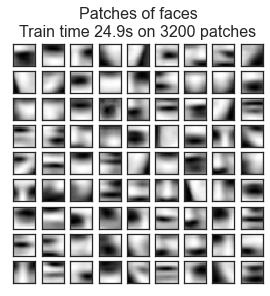

In [34]:
import time

import matplotlib.pyplot as plt
import numpy as np


from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

faces = datasets.fetch_olivetti_faces()

#################################################################################

print("Learning the dictionary... ")
rng = np.random.RandomState(0)
kmeans = MiniBatchKMeans(n_clusters=81, random_state=rng, verbose=True)
patch_size = (20, 20)

buffer = []
t0 = time.time()

# The online learning part: cycle over the whole dataset 6 times
index = 0
for _ in range(6):
    for img in faces.images:
        data = extract_patches_2d(img, patch_size, max_patches=50, random_state=rng)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            data = np.concatenate(buffer, axis=0)
            data -= np.mean(data, axis=0)
            data /= np.std(data, axis=0)
            kmeans.partial_fit(data)
            buffer = []
        if index % 100 == 0:
            print("Partial fit of %4i out of %i" % (index, 6 * len(faces.images)))

dt = time.time() - t0
print("done in %.2fs." % dt)

# #############################################################################
# Plot the results
plt.figure(figsize=(4.2, 4))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())


plt.suptitle(
    "Patches of faces\nTrain time %.1fs on %d patches" % (dt, 8 * len(faces.images)),
    fontsize=16,
)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

(400, 64, 64)
(400, 4096)
(400,)
[0.925 0.775 0.875 0.675 0.75 ]
Mean score 0.8(+-0.04472135954999579)
accuracy :  1.0
accuracy :  0.925


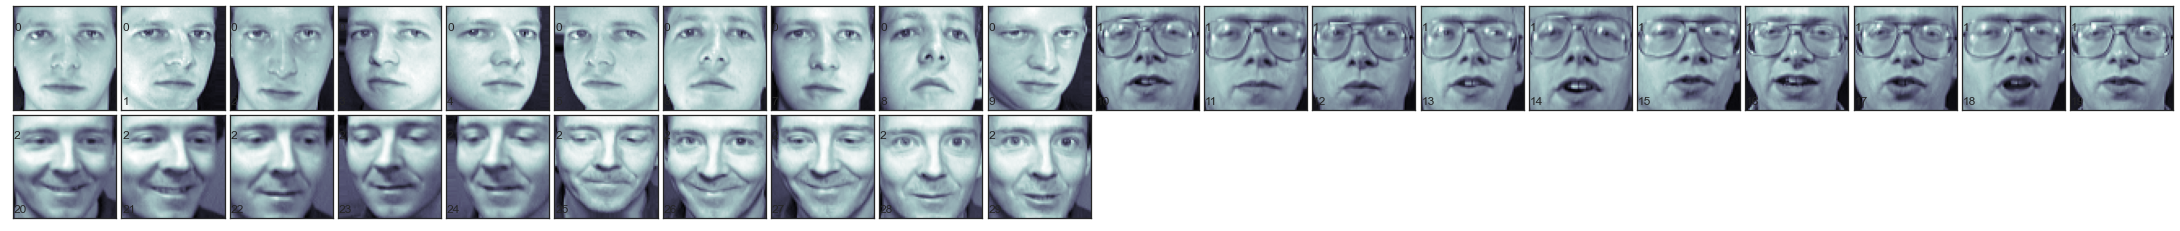

In [96]:
#4. SVM 으로 이미지 데이터로 모델링 해보자.  
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import  fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans

from scipy.stats import  sem  # 배열에 있는 값의 평균의 표준 오차    
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm  import SVC
from sklearn.model_selection  import train_test_split

# 4-1 데이터 로드  
faces = datasets.fetch_olivetti_faces()
#print(faces.DESCR)

#4-2. 속성값 출력 해보자 
print(faces.images.shape)# (400, 64, 64)  64*64  이미장 400장  
print(faces.data.shape) # (64*64)   일렬로  400개  
print(faces.target.shape)  # 400*1   = 정답 데이터가 400  



#4-3 print_faces user_function  
def print_faces(images, target, top_n):
    fig  = plt.figure (figsize =(30,30))
    fig.subplots_adjust(left=0, right=1, bottom =0, top=1, hspace =0.05, wspace =0.05)
    
    for i in range(top_n):
         p=fig.add_subplot(20,20, i+1, xticks =[], yticks =[])
         p.imshow(images[i],cmap = plt.cm.bone)
        
         p.text(0,14, str(target[i]))
         p.text(0,60,str(i))

#출력 이미지  
print_faces(faces.images ,faces.target, 30)
#4-4  모델 생성  


svc = SVC(kernel ='linear')

#4-5학습용 데이터, 검증용 데이터 분철 
X = faces.data   #64*64 일렬로 400개 
y = faces.target  # 400*1    = 정답 데이터가 400

x_train , x_test, y_train , y_test  = train_test_split(X,y, test_size =  0.5, random_state =0)
#4-6  검증  k- 교차검증  
# KFold  -> k- 교차검증  -> train -> train-> validation  

#ex  )   k=5   [1,2,3,5] [4] 
def  my_cross(clf, x,y,K):
    res_cv= KFold(n_splits= K, random_state =0, shuffle= True)
    score  = cross_val_score(clf, x,y, cv= res_cv)
    print(score)
    print("Mean score {}(+-{})".format(np.mean(score),sem(score)))


my_cross(svc, x_train, y_train, 5)
#4-7 성능평가 
def  my_train_test(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    print("accuracy : " , clf.score(x_train, y_train))  # 학습데이터  
    print("accuracy : " , clf.score(x_test, y_test))  #  테스트 데이터  

my_train_test(svc, x_train, x_test, y_train, y_test)

In [36]:
#5. SVM 으로 이미지 데이터로 모델링 해보자.  
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import  fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans

from scipy.stats import  sem  # 배열에 있는 값의 평균의 표준 오차    
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm  import SVC
from sklearn.model_selection  import train_test_split

# 5-1 데이터 로드  
faces = load_iris()
#print(faces.DESCR)

#5-2. 속성값 출력 해보자 
#print(faces.images.shape)# (400, 64, 64)  64*64  이미장 400장  
print(faces.data.shape) # (64*64)   일렬로  400개  
print(faces.target.shape)  # 400*1   = 정답 데이터가 400  

#5-4  모델 생성  
svc = SVC(kernel ='linear')

#5-5학습용 데이터, 검증용 데이터 분철 
X = faces.data   #64*64 일렬로 400개 
y = faces.target  # 400*1    = 정답 데이터가 400

x_train , x_test, y_train , y_test  = train_test_split(X,y, test_size =  0.5, random_state =0)
#5-6  검증  k- 교차검증  


#ex  )   k=5   [1,2,3,5] [4] 
def  my_cross(clf, x,y,K):
    res_cv= KFold(n_splits= K, random_state =0, shuffle= True)
    score  = cross_val_score(clf, x,y, cv= res_cv)
    print(score)
    print("Mean score {}(+-{})".format(np.mean(score),sem(score)))


my_cross(svc, x_train, y_train, 5)
#5-7 성능평가 
def  my_train_test(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    print("accuracy : " , clf.score(x_train, y_train))  # 학습데이터  
    print("accuracy : " , clf.score(x_test, y_test))  #  테스트 데이터  

my_train_test(svc, x_train, x_test, y_train, y_test)

(150, 4)
(150,)
[0.93333333 1.         1.         1.         0.93333333]
Mean score 0.9733333333333334(+-0.016329931618554516)
accuracy :  0.9733333333333334
accuracy :  0.9733333333333334


## KNN Classification
dis(xi,xj)=$\sqrt{{(xi1−xj1)2+...(xin−xjn)2}}$
 
